# Milestone 4 - Independent Project

## Author - Kenneth Drabble



## Instructions

1. Generate a clear statement problem and provide the location for the datasetyou use.
2. Provide a clear solution to the problem for a non-technical audience.
3. Visually explore the data to generate insight and include summary statistics.
4. Use an appropriate statistical analysis method.
5. Prepare the data via cleaning, normalization, encoding, et cetera.
6. Generate and evaluate a working model (hypothesis, linear, or time series).
7. Draw direct inferences and conclusions from model results.
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

In [1]:
# LIBRARIES
from math import pi
import pandas as pd
import numpy.random as nr
import numpy as np
from math import sin
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn
import pymc3
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import sklearn.naive_bayes

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\python36\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Location of dataset

# CHANGE THIS LOCAL PATH TO RUN ON DIFFERENT MACHINES
filepath = "C:/Users/Kenny/Downloads/DATASCI410/Milestones/kc_house_data.csv"
# CHANGE THIS LOCAL PATH TO RUN ON DIFFERENT MACHINES

houses = pd.read_csv(filepath, delimiter=',')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Inverted Matrix
home_vars = houses.loc[:,['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'zipcode']]
inM = home_vars.as_matrix()
price = houses.loc[:, 'price']
n_points = 21613

print('1st 5 rows of Data Frame: ')
print(home_vars.head())
print('\n1st 5 rows in matrix Form: ')
print(inM[0:5, :])

c:\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


1st 5 rows of Data Frame: 
   sqft_living  sqft_lot  floors  waterfront  zipcode
0         1180      5650     1.0           0    98178
1         2570      7242     2.0           0    98125
2          770     10000     1.0           0    98028
3         1960      5000     1.0           0    98136
4         1680      8080     1.0           0    98074

1st 5 rows in matrix Form: 
[[1.1800e+03 5.6500e+03 1.0000e+00 0.0000e+00 9.8178e+04]
 [2.5700e+03 7.2420e+03 2.0000e+00 0.0000e+00 9.8125e+04]
 [7.7000e+02 1.0000e+04 1.0000e+00 0.0000e+00 9.8028e+04]
 [1.9600e+03 5.0000e+03 1.0000e+00 0.0000e+00 9.8136e+04]
 [1.6800e+03 8.0800e+03 1.0000e+00 0.0000e+00 9.8074e+04]]


In [4]:
beta_coeffs, resids, rank, s = np.linalg.lstsq(inM, price)
print('beta coefficients: {}'.format(beta_coeffs))
print('\nsingular values: {}'.format(s))

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


beta coefficients: [ 2.73321240e+02 -2.89957264e-01  6.69602557e+03  8.31086726e+05
 -4.10605048e-01]

singular values: [1.46273874e+07 6.00387673e+06 1.32988465e+05 7.40517727e+01
 1.26488964e+01]


Intercept: -43580.74309
Slope : 280.62357


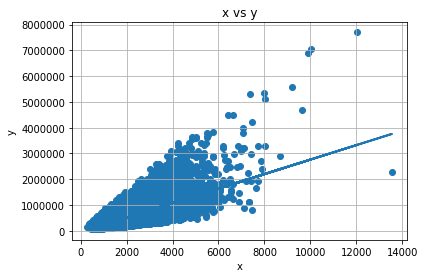

In [10]:
# Living Space
living = pd.DataFrame({'x':home_vars['sqft_living'], 'y':price})
linear_model1 = linear_model.LinearRegression()
x_input = living['x'].values.reshape(n_points, 1)
y_output = living['y'].values.reshape(n_points, 1)
linear_model1.fit(x_input, y_output)
y_pred = linear_model1.predict(x_input)
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
print('Intercept: {0:.5f}'.format(linear_model1.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model1.coef_[0][0]))

Intercept: 528082.61280
Slope : 0.79470


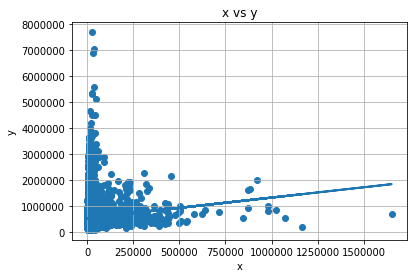

In [14]:
living_15 = pd.DataFrame({'x': houses['sqft_living15'], 'y':price})
linear_model1 = linear_model.LinearRegression()
x_input = lot['x'].values.reshape(n_points, 1)
y_output = lot['y'].values.reshape(n_points, 1)
linear_model1.fit(x_input, y_output)
y_pred = linear_model1.predict(x_input)
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
print('Intercept: {0:.5f}'.format(linear_model1.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model1.coef_[0][0]))

Intercept: 528082.61280
Slope : 0.79470


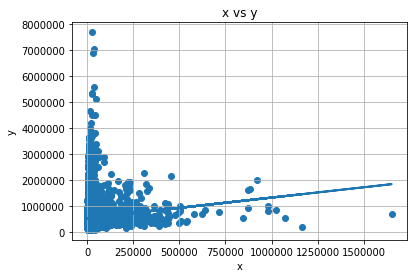

In [12]:
# Square footage of Lot
lot = pd.DataFrame({'x':home_vars['sqft_lot'], 'y':price})
linear_model2 = linear_model.LinearRegression()
x_input = lot['x'].values.reshape(n_points, 1)
y_output = lot['y'].values.reshape(n_points, 1)
linear_model2.fit(x_input, y_output)
y_pred = linear_model2.predict(x_input)
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
print('Intercept: {0:.5f}'.format(linear_model2.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model2.coef_[0][0]))

Intercept: 279198.51119
Slope : 174588.81258


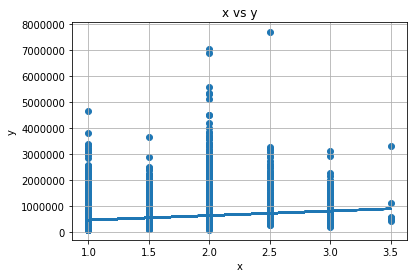

In [7]:
# Number of Floors
floors = pd.DataFrame({'x':home_vars['floors'], 'y':price})
linear_model3 = linear_model.LinearRegression()
x_input = floors['x'].values.reshape(n_points, 1)
y_output = floors['y'].values.reshape(n_points, 1)
linear_model3.fit(x_input, y_output)
y_pred = linear_model3.predict(x_input)
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
print('Intercept: {0:.5f}'.format(linear_model3.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model3.coef_[0][0]))